26.27862320874889 21.110571570611206
22.00383841157021


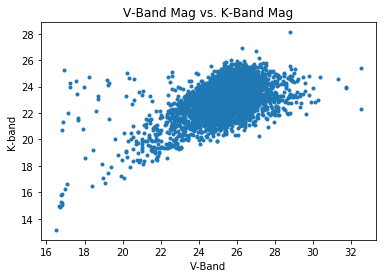

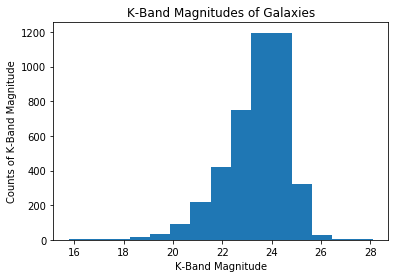

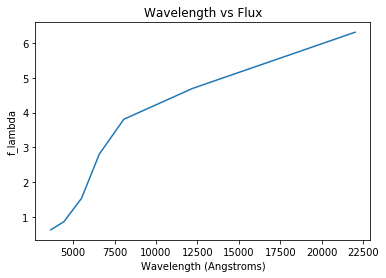

In [4]:
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import csv
import math
from collections import Counter
import random

import numpy as np
from numpy.polynomial.polynomial import polyfit



#f = open('/home/jacob/PHOTOMETRY/PHOTOM_CATS/SpARCS-0035_totalall_HAWKIKs.cat', 'r')
#file_contents = f.read()
#print(file_contents)
#f.close()
#Testing that I could read in the file without issue

fluxv = []
fluxk = []

histflux = []
galnum = []


goodval = []

#with open('/home/jacob/PHOTOMETRY/PHOTOM_CATS/SpARCS-0035_totalall_HAWKIKs.cat', 'r') as magfile:
with open('SpARCS-0035_totalall_HAWKIKs.cat', 'r') as magfile:
    magplots = csv.reader(magfile)
    firstmagline = magfile.readline()
    for line in magfile:
        id , ra , dec , x , y , hawkiks_tot , k_flag , k_star , k_fluxrad , totmask , hawkiks , ehawkiks , vimosu , evimosu , vimosb , \
        evimosb , vimosv , evimosv , vimosr , evimosr , vimosi , evimosi , decamz , edecamz , fourstarj1 , efourstarj1 , hawkij , ehawkij , \
        irac1 , eirac1 , irac2, eirac2 , irac3 , eirac3 , irac4 , eirac4 = line.split()
        try:
            testx = float(vimosv)
            testy = float(hawkiks)
        except ValueError:
            print(vimosv, hawkiks)
        if testx < 0.0:
            continue
        if testy < 0.0:
            continue
        try:
            magfluxv = -2.5 * math.log10(testx) + 25
            magfluxk = -2.5 * math.log10(testy) + 25
        except ValueError:
            print(magfluxv, magfluxk)
        fluxv.append(magfluxv)
        fluxk.append(magfluxk)

#with open('/home/jacob/PHOTOMETRY/PHOTOM_CATS/SpARCS-0035_totalall_HAWKIKs.cat', 'r') as magfile:
with open('SpARCS-0035_totalall_HAWKIKs.cat', 'r') as magfile:
    magplots = csv.reader(magfile)
    firstmagline = magfile.readline()
    for line in magfile:
        id , ra , dec , x , y , hawkiks_tot , k_flag , k_star , k_fluxrad , totmask , hawkiks , ehawkiks , vimosu , evimosu , vimosb , \
        evimosb , vimosv , evimosv , vimosr , evimosr , vimosi , evimosi , decamz , edecamz , fourstarj1 , efourstarj1 , hawkij , ehawkij , \
        irac1 , eirac1 , irac2, eirac2 , irac3 , eirac3 , irac4 , eirac4 = line.split()

        goodflag = float(k_flag)
        goodhawki = float(hawkiks)

        if goodflag != 0.0:
            continue
        try:
            histfluxk = -2.5 * math.log10(goodhawki) +25
        except ValueError:
            print(histfluxk)

        #def histo(iterable, low, high, bins):
            #kval = histfluxk
            #histo(kval, 0, 30, 2)

            #step = (high - low + 0.0) / bins
            #dist = Counter((float(x) - low) // step for x in iterable)
            #was testing on how to do bins, did not work

        histflux.append(histfluxk)
        galnum.append(float(id))

#with open('/home/jacob/PHOTOMETRY/PHOTOM_CATS/SpARCS-0035_totalall_HAWKIKs.cat', 'r') as magfile:
with open('SpARCS-0035_totalall_HAWKIKs.cat', 'r') as magfile:
    magplots = csv.reader(magfile)
    firstmagline = magfile.readline()
    for line in magfile:
        id , ra , dec , x , y , hawkiks_tot , k_flag , k_star , k_fluxrad , totmask , hawkiks , ehawkiks , vimosu , evimosu , vimosb , \
        evimosb , vimosv , evimosv , vimosr , evimosr , vimosi , evimosi , decamz , edecamz , fourstarj1 , efourstarj1 , hawkij , ehawkij , \
        irac1 , eirac1 , irac2, eirac2 , irac3 , eirac3 , irac4 , eirac4 = line.split()

        goodphoto = float(k_flag)
        goodktot = float(hawkiks_tot)
        goodk = float(hawkiks)
        goodu = float(vimosu)
        goodv = float(vimosv)
        goodb = float(vimosb)
        goodr = float(vimosr)
        goodi = float(vimosi)
        goodj = float(hawkij)

        lamk = 2.2*10**4
        lamu = 3.65*10**3
        lamv = 5.51*10**3
        lamb = 4.45*10**3
        lamr = 6.58*10**3
        lami = 8.06*10**3
        lamj = 1.22*10**4


        if goodphoto != 0.0:
            continue
        try:
            ranhawk = -2.5*math.log10(goodktot) + 25
        except ValueError:
            print(ranhawk)
        if ranhawk > 23.0:
            continue
        if goodk < 0.0:
            continue
        if goodu < 0.0:
            continue
        if goodv < 0.0:
            continue
        if goodb < 0.0:
            continue
        if goodr < 0.0:
            continue
        if goodi < 0.0:
            continue
        if goodj < 0.0:
            continue

        lamval = [lamu, lamb, lamv, lamr, lami, lamj, lamk]
        goodval = [goodu, goodb, goodv, goodr, goodi, goodj, goodk]







plt.plot(fluxv, fluxk, '.')
plt.xlabel('V-Band')
plt.ylabel('K-band')
plt.title('V-Band Mag vs. K-Band Mag')
plt.show()

n, bins, patches = plt.hist(histflux, bins = 15)
plt.xlabel('K-Band Magnitude')
plt.ylabel('Counts of K-Band Magnitude')
plt.title('K-Band Magnitudes of Galaxies')
plt.show()

plt.plot(lamval, goodval)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('f_lambda')
plt.title('Wavelength vs Flux')
plt.show()
